In [125]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [126]:
%pip install ipython-sql
# Load the SQL extension
%load_ext sql

# Connect to an in-memory SQLite database
%sql sqlite://

# Create a table and insert your DataFrame into the table
%sql DROP TABLE IF EXISTS players;
%sql PERSIST df;  -- PERSIST allows you to create a table from a DataFrame




Note: you may need to restart the kernel to use updated packages.
The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * sqlite://
Done.
 * sqlite://
(sqlite3.OperationalError) near "PERSIST": syntax error
[SQL: PERSIST df;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [127]:
# Replace 'your_file.csv' with the actual file path
file_path = 'SalaryPrediction.csv'

# Read CSV file into a DataFrame
data = pd.read_csv(file_path)


In [128]:
data.shape

(3907, 8)

In [129]:
data.columns

Index(['Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'], dtype='object')

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      3907 non-null   object
 1   Age       3907 non-null   int64 
 2   Club      3907 non-null   object
 3   League    3907 non-null   object
 4   Nation    3907 non-null   object
 5   Position  3907 non-null   object
 6   Apps      3907 non-null   int64 
 7   Caps      3907 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 244.3+ KB


In [131]:
data.describe()

,Age,Apps,Caps
count,3907.000000,3907.000000,3907.000000
mean,24.120553,140.057077,8.926542
std,4.935638,131.694425,20.518234
min,18.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000
50%,24.000000,115.000000,0.000000
75%,28.000000,224.500000,6.000000
max,41.000000,715.000000,180.000000


In [132]:
data.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45


In [133]:
data['Club'].unique()

array(['PSG', 'R. Madrid', 'Man UFC', 'Inter', 'Liverpool', 'Chelsea',
       'Man City', 'A. Madrid', 'FC Bayern', 'Barcelona', 'Tottenham',
       'Juventus', 'Nottm Forest', 'A. Bilbao', 'Borussia Dortmund',
       'Capitoline', 'Arsenal', 'RB Leipzig', 'Newcastle', 'Leicester',
       'Sporting CP', 'Everton', 'West Ham', 'Crystal Palace',
       'AS Monaco', 'Aston Villa', 'OGC Nice', 'Lazio', 'Milan', 'LOSC',
       'Bayer 04', 'Parthenope', 'Wolves', 'Sevilla', 'Real Hispalis',
       'Bournemouth', 'Southampton', 'OL', 'Villarreal', 'OM', 'Leeds',
       'Sampdoria', 'Fiorentina', 'Sassuolo', 'Benfica', 'Fulham',
       'Salento', 'Real San Sebastian', 'Salernitana', 'Brighton',
       'Hertha Berlin', 'Valencia', "Borussia M'gladbach", 'Torino',
       'Spezia', 'Getafe', 'Mallorca', 'VfL Wolfsburg', 'Hoffenheim',
       'SV Werder', 'Bologna', 'Brianza', 'Atalanta', 'Strasbourg',
       'Girona', 'Eintracht Frankfurt', 'Vallecano', '1. FC Koln',
       'Verona', 'Rennes', 'Vi

In [134]:
data['Position'].unique()

array(['Forward', 'Midfilder', 'Goalkeeper', 'Defender'], dtype=object)

In [135]:
data['League'].unique()

array(['Ligue 1 Uber Eats', 'La Liga', 'Premier League', 'Serie A',
       'Bundesliga', 'Primiera Liga'], dtype=object)

In [136]:
data['Wage'] = pd.to_numeric(data['Wage'].replace('[,]', '', regex=True), errors='coerce')

data['Wage'] = data['Wage'].astype(int)

In [137]:
figure1 = px.scatter(data, x='Age', y='Wage', color='Age', title='Wage based on age')
figure1.show()

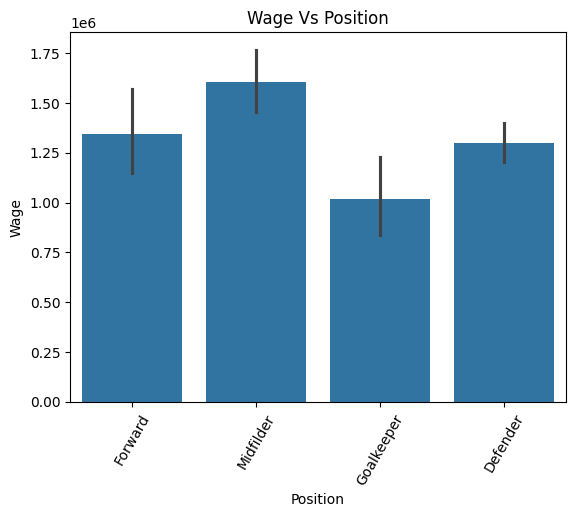

In [138]:
sns.barplot(data, x="Position", y="Wage", dodge = '2')
plt.title('Wage Vs Position')
plt.xticks(rotation=60)
plt.show()

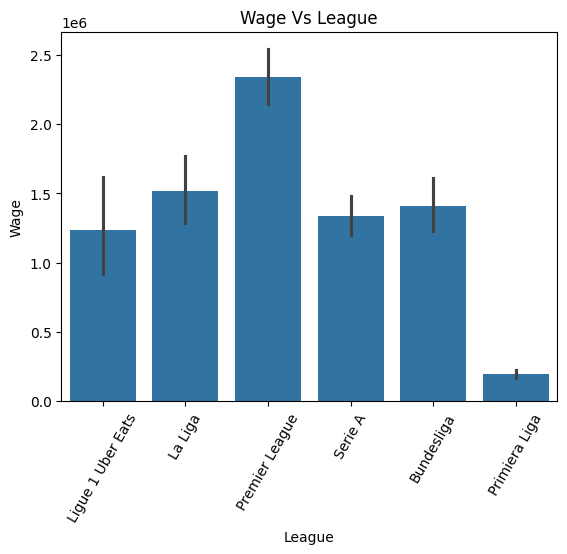

In [139]:
sns.barplot(data, x="League", y="Wage", dodge = '2')
plt.title('Wage Vs League')
plt.xticks(rotation=60)
plt.show()

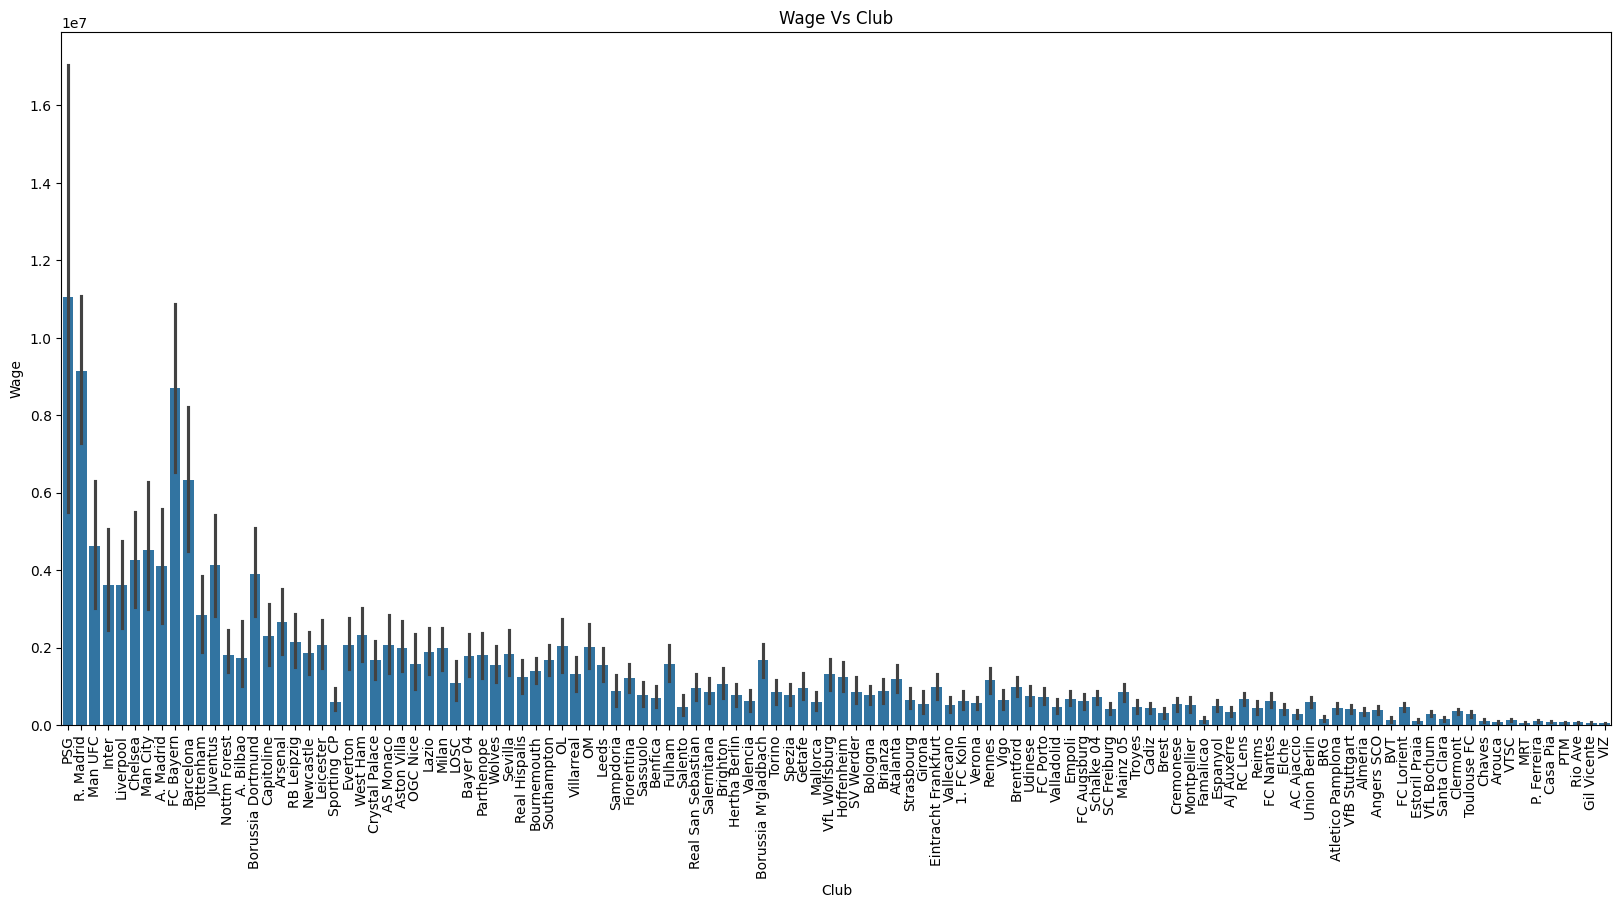

In [140]:
plt.figure(figsize=(20, 9))
sns.barplot(data, x="Club", y="Wage", dodge = '2')
plt.title('Wage Vs Club')
plt.xticks(rotation=90)
plt.show()

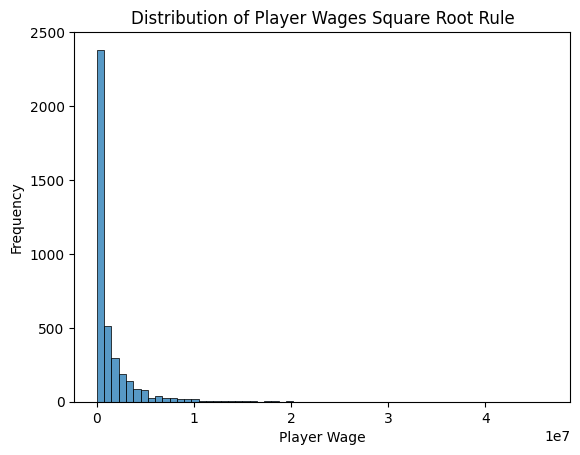

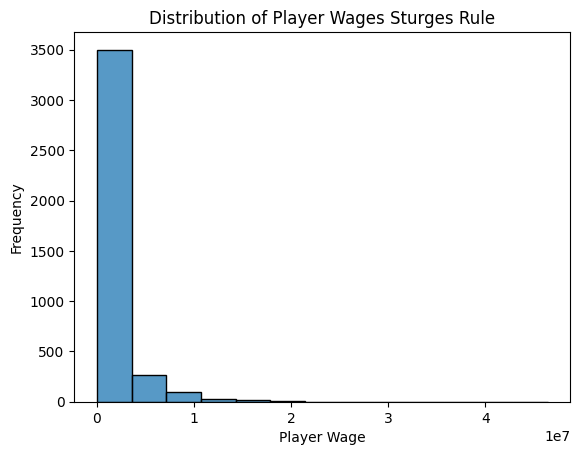

In [141]:
#Square Root Rule:
num_bins = int(np.sqrt(len(data['Wage'])))
sns.histplot(data['Wage'], bins = num_bins , kde=False)  # Adjust the number of bins as needed
plt.xlabel('Player Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Player Wages Square Root Rule')
plt.show()

#Sturges' Rule:
num_bins = int(np.ceil(1 + np.log2(len(data['Wage']))))
sns.histplot(data['Wage'], bins = num_bins , kde=False)  # Adjust the number of bins as needed
plt.xlabel('Player Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Player Wages Sturges Rule')
plt.show()

In [142]:
condition1 = data['League'] == 'Premier League'
condition2 = (data['Club'] == 'Arsenal' )|(data['Club'] == 'Spur' )| (data['Club'] == 'Man City')|(data['Club'] == 'Liverpool')|(data['Club'] == 'Chelsea')|(data['Club'] == 'Man UFC')

PlBig6_data = data[condition1 & condition2 ]

In [143]:
PlBig6_data.shape

(229, 8)

In [144]:
PlBig6_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 4 to 3338
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      229 non-null    int32 
 1   Age       229 non-null    int64 
 2   Club      229 non-null    object
 3   League    229 non-null    object
 4   Nation    229 non-null    object
 5   Position  229 non-null    object
 6   Apps      229 non-null    int64 
 7   Caps      229 non-null    int64 
dtypes: int32(1), int64(3), object(4)
memory usage: 15.2+ KB


In [145]:
PlBig6_data.describe

<bound method NDFrame.describe of           Wage  Age       Club          League Nation    Position  Apps  Caps
4     19500000   31    Man UFC  Premier League    ESP  Goalkeeper   480    45
7     18200000   30  Liverpool  Premier League    EGY     Forward   367    85
8     18200000   27    Chelsea  Premier League    ENG   Midfilder   326    77
9     18200000   29    Man UFC  Premier League    FRA    Defender   287    86
10    17680000   31   Man City  Premier League    BEL   Midfilder   399    91
...        ...  ...        ...             ...    ...         ...   ...   ...
3236     40000   20  Liverpool  Premier League    ENG     Forward     0     0
3237     40000   19  Liverpool  Premier League    ENG  Goalkeeper     0     0
3238     40000   18  Liverpool  Premier League    GER    Defender     0     0
3245     39000   19    Man UFC  Premier League    NIR  Goalkeeper    13     0
3338     31000   19   Man City  Premier League    ENG   Midfilder     0     0

[229 rows x 8 columns]>

In [146]:
figure1 = px.scatter(PlBig6_data, x='Age', y='Wage', color='Age', title='Wage based on age')
figure1.show()

In [147]:
use_data = PlBig6_data.drop(columns=['Apps', 'Caps','League'], errors='ignore')


In [148]:
use_data.info

<bound method DataFrame.info of           Wage  Age       Club Nation    Position
4     19500000   31    Man UFC    ESP  Goalkeeper
7     18200000   30  Liverpool    EGY     Forward
8     18200000   27    Chelsea    ENG   Midfilder
9     18200000   29    Man UFC    FRA    Defender
10    17680000   31   Man City    BEL   Midfilder
...        ...  ...        ...    ...         ...
3236     40000   20  Liverpool    ENG     Forward
3237     40000   19  Liverpool    ENG  Goalkeeper
3238     40000   18  Liverpool    GER    Defender
3245     39000   19    Man UFC    NIR  Goalkeeper
3338     31000   19   Man City    ENG   Midfilder

[229 rows x 5 columns]>

In [149]:
x_train_encoded = pd.get_dummies(use_data, columns=['Position', 'Club'])

In [150]:
x_train_encoded.info

<bound method DataFrame.info of           Wage  Age Nation  Position_Defender  Position_Forward  \
4     19500000   31    ESP              False             False   
7     18200000   30    EGY              False              True   
8     18200000   27    ENG              False             False   
9     18200000   29    FRA               True             False   
10    17680000   31    BEL              False             False   
...        ...  ...    ...                ...               ...   
3236     40000   20    ENG              False              True   
3237     40000   19    ENG              False             False   
3238     40000   18    GER               True             False   
3245     39000   19    NIR              False             False   
3338     31000   19    ENG              False             False   

      Position_Goalkeeper  Position_Midfilder  Club_Arsenal  Club_Chelsea  \
4                    True               False         False         False   
7        

In [151]:
# Create a boolean mask for 'Eng'
eng_mask = x_train_encoded['Nation'] == 'ENG'

# Update the 'Nation' column based on the mask
x_train_encoded['Nation'] = eng_mask.astype(int)

In [152]:
x_train_encoded.info

<bound method DataFrame.info of           Wage  Age  Nation  Position_Defender  Position_Forward  \
4     19500000   31       0              False             False   
7     18200000   30       0              False              True   
8     18200000   27       1              False             False   
9     18200000   29       0               True             False   
10    17680000   31       0              False             False   
...        ...  ...     ...                ...               ...   
3236     40000   20       1              False              True   
3237     40000   19       1              False             False   
3238     40000   18       0               True             False   
3245     39000   19       0              False             False   
3338     31000   19       1              False             False   

      Position_Goalkeeper  Position_Midfilder  Club_Arsenal  Club_Chelsea  \
4                    True               False         False         False 

In [153]:
# Assuming df is your DataFrame and "Nation" is the column you want to convert
x_train_encoded['Nation'] = x_train_encoded['Nation'].astype(bool)


In [154]:
wage_column = x_train_encoded['Wage']

# Calculate the mean and standard deviation
mean_wage = wage_column.mean()
std_wage = wage_column.std()

# Print the results
print(f"Mean Wage: {mean_wage}")
print(f"Standard Deviation of Wage: {std_wage}")

Mean Wage: 3949890.8296943232
Standard Deviation of Wage: 4605249.958104995


In [155]:

# Standardize numerical features
numerical_features = ['Wage', 'Age']
scaler = StandardScaler()
x_train_encoded[numerical_features] = scaler.fit_transform(x_train_encoded[numerical_features])

# Display the preprocessed DataFrame
x_train_encoded.head()

,Wage,Age,Nation,Position_Defender,Position_Forward,Position_Goalkeeper,Position_Midfilder,Club_Arsenal,Club_Chelsea,Club_Liverpool,Club_Man City,Club_Man UFC
4,3.384002,1.653140,False,False,False,True,False,False,False,False,False,True
7,3.101097,1.447619,False,False,True,False,False,False,False,True,False,False
8,3.101097,0.831057,True,False,False,False,True,False,True,False,False,False
9,3.101097,1.242099,False,True,False,False,False,False,False,False,False,True
10,2.987935,1.653140,False,False,False,False,True,False,False,False,True,False


In [156]:
# Assuming df_final is your preprocessed DataFrame with one-hot encoding
X = x_train_encoded.drop('Wage', axis=1)  # Features
y = x_train_encoded['Wage']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (183, 11)
y_train shape: (183,)
X_test shape: (46, 11)
y_test shape: (46,)


In [157]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [158]:
# Display the data types of all columns in X_train
print(y_train.dtype)
print(X_train.dtype)
print(X_train.shape)

float32
float32
(183, 11)


In [159]:
print("X_train:")
print(X_train[:5])

print("\ny_train:")
print(y_train[:5])

X_train:
[[-1.0186286   1.          1.          0.          0.          0.
   0.          1.          0.          0.          0.        ]
 [ 0.42001602  0.          0.          0.          0.          1.
   0.          0.          0.          0.          1.        ]
 [-0.6075873   0.          1.          0.          0.          0.
   0.          0.          1.          0.          0.        ]
 [ 1.4476193   0.          0.          0.          0.          1.
   1.          0.          0.          0.          0.        ]
 [-0.8131079   1.          0.          0.          0.          1.
   0.          0.          1.          0.          0.        ]]

y_train:
[-0.8199652   0.7246955  -0.8312814   0.38520965 -0.8312814 ]


In [160]:
from keras import models, layers, regularizers

# Define the neural network model with L2 regularization
model = models.Sequential()

# Add layers to the model with L2 regularization
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.05), input_shape=(11,)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
model.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.05)))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))




Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                768       
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


12/12 [==============================] - 1s 14ms/step - loss: 3.9207 - mse: 0.9608 - val_loss: 3.4291 - val_mse: 0.6271
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 3.5141 - mse: 0.8221 - val_loss: 3.0925 - val_mse: 0.5404
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 3.1769 - mse: 0.7281 - val_loss: 2.7996 - val_mse: 0.4804
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 2.8903 - mse: 0.6659 - val_loss: 2.5555 - val_mse: 0.4497
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 2.6413 - mse: 0.6207 - val_loss: 2.3371 - val_mse: 0.4228
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 2.4252 - mse: 0.5889 - val_loss: 2.1480 - val_mse: 0.4093
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 2.2338 - mse: 0.5677 - val_loss: 1.9799 - val_mse: 0.4033
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 2.0623 - mse: 0.5500 

In [161]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


2/2 [==============================] - 0s 4ms/step - loss: 0.6241 - mse: 0.4395
Test Loss: [0.6241205334663391, 0.43953707814216614]


In [162]:
predictions = model.predict(X_test)
# Using type() function
print(type(predictions))

# Using .dtype attribute for NumPy arrays
if isinstance(predictions, np.ndarray):
    print(predictions.dtype)

print("predictions:")
print(predictions[:5])
print(predictions.shape)

2/2 [==============================] - 0s 2ms/step
<class 'numpy.ndarray'>
float32
predictions:
[[-0.7637447 ]
 [ 0.6464491 ]
 [-0.06829171]
 [-0.8882433 ]
 [-0.09633882]]
(46, 1)


In [163]:
predictions_originalWage = predictions*std_wage+mean_wage
print(predictions_originalWage)
y_test_original = y_test*std_wage+mean_wage
print(y_test_original)


[[ 432655.5 ]
 [6926950.5 ]
 [3635390.2 ]
 [-140691.75]
 [3506226.5 ]
 [ 128901.25]
 [8446445.  ]
 [4370900.5 ]
 [1489819.8 ]
 [2122342.5 ]
 [ 395809.25]
 [7437979.  ]
 [1819295.5 ]
 [1788338.  ]
 [-141728.75]
 [2162795.8 ]
 [2043247.2 ]
 [7366160.  ]
 [1594634.  ]
 [2338726.  ]
 [8392672.  ]
 [1305073.5 ]
 [ 518846.5 ]
 [1852480.8 ]
 [1489819.8 ]
 [6968073.  ]
 [3236901.8 ]
 [3472794.  ]
 [4585435.5 ]
 [3814916.  ]
 [1960399.1 ]
 [7276365.  ]
 [5436826.  ]
 [7405447.  ]
 [8580911.  ]
 [3458388.5 ]
 [ 226760.25]
 [6373669.  ]
 [4476411.  ]
 [ 550694.75]
 [4094624.  ]
 [ 126863.25]
 [1156551.2 ]
 [8251477.  ]
 [6591003.  ]
 [9279393.  ]]
[   43461.25  6245016.5  14322673.      95575.   11977547.      69518.25
  9371851.      95575.     147689.25  1294195.      43461.25 10414130.
  3378751.5    121632.      31435.     356144.75   251916.75  9111282.
    31435.     121632.    2597043.     147689.25    69518.25   121632.
  1294195.   10414130.     251916.75  2857612.5   2597043.    4681599

Mean Squared Error: 9321846000000.0
R-squared: 0.40221979367837246


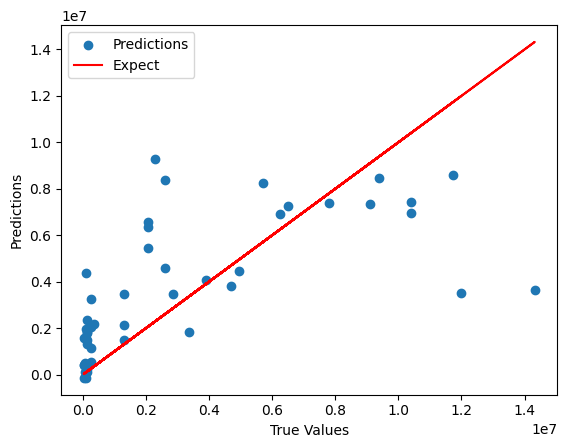

In [164]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate metrics
mse = mean_squared_error(y_test_original, predictions_originalWage)
r2 = r2_score(y_test_original, predictions_originalWage)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize predictions vs true values
plt.scatter(y_test_original, predictions_originalWage, label="Predictions")
plt.plot(y_test_original, y_test_original, color='red', label="Expect")  # Line where x equals y
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()  # Display legend
plt.show()



In [165]:
from keras import models, layers, regularizers

# Define the neural network model with L2 regularization
model = models.Sequential()

# Add layers to the model with L2 regularization
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.03), input_shape=(11,)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
model.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.03)))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 16)                192       
                                                                 
 dense_40 (Dense)            (None, 8)                 136       
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
12/12 [==============================] - 1s 24ms/step - loss: 2.1957 - mse: 1.4261 - val_loss: 1.6959 - val_mse: 0.9406
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 2.0518 - mse: 1.3073 - val_loss: 1.6118 - val_mse: 0.8811
Epoch 3/300
12/12 [=====

In [166]:
from keras import models, layers, regularizers

# Define the neural network model with L2 regularization
model = models.Sequential()

# Add layers to the model with L2 regularization
model.add(layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(11,)))
model.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.01)))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 6)                 72        
                                                                 
 dense_43 (Dense)            (None, 1)                 7         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/300
12/12 [==============================] - 1s 18ms/step - loss: 2.2896 - mse: 2.1881 - val_loss: 1.5639 - val_mse: 1.4634
Epoch 2/300
12/12 [==============================] - 0s 5ms/step - loss: 2.0948 - mse: 1.9950 - val_loss: 1.4420 - val_mse: 1.3431
Epoch 3/300
12/12 [==============================] - 0s 6ms/step - loss: 1.9291 - mse: 1.8309 - val_loss: 1.3404 - val_mse: 1.2430
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 1.8062 - mse: 1.7096 - val_loss: 1.2523 - val_mse: 1.1565
Epoch 5/300
12/12 [==============================] - 0s 6ms/step - loss: 1.6978 - mse: 1.6027 - val_loss: 1.1840 - val_mse: 1.0897
Epoch 6/300
12/12 [==============================] - 0s 6ms/step - loss: 1.6066 - mse: 1.5130 - val_loss: 1.1273 - val_mse: 1.0345
Epoch 7/300
12/12 [==============================] - 0s 5ms/step - loss: 1.5345 - mse: 1.4423 - val_loss: 1.0773 - val_mse: 0.9858
Epoch 8/300
12/12 [==============================] - 0s 6ms/step - loss: 1.4690 - 

In [167]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

2/2 [==============================] - 0s 9ms/step - loss: 0.5042 - mse: 0.4546
Test Loss: [0.5041652321815491, 0.4546421766281128]


In [168]:
predictions = model.predict(X_test)
# Using type() function
print(type(predictions))

# Using .dtype attribute for NumPy arrays
if isinstance(predictions, np.ndarray):
    print(predictions.dtype)

print("predictions:")
print(predictions[:5])
print(predictions.shape)

2/2 [==============================] - 0s 5ms/step
<class 'numpy.ndarray'>
float32
predictions:
[[-0.7738497 ]
 [ 0.79853904]
 [ 0.03662193]
 [-1.2463778 ]
 [-0.06430638]]
(46, 1)


In [169]:
predictions_originalWage = predictions*std_wage+mean_wage
print(predictions_originalWage)
y_test_original = y_test*std_wage+mean_wage
print(y_test_original)

[[  386119.25]
 [ 7627363.  ]
 [ 4118544.  ]
 [-1789990.8 ]
 [ 3653743.8 ]
 [ -994849.75]
 [ 8931223.  ]
 [ 4895377.5 ]
 [ 1839555.5 ]
 [ 2677236.  ]
 [  246847.  ]
 [ 8382713.  ]
 [ 2218960.5 ]
 [ 2384663.  ]
 [-1811153.2 ]
 [ 2631000.5 ]
 [ 3170648.  ]
 [ 5993871.  ]
 [ 2010003.9 ]
 [ 2925831.  ]
 [ 8260574.  ]
 [ 1650536.  ]
 [  190950.  ]
 [ 2030535.5 ]
 [ 1839555.5 ]
 [ 7616969.  ]
 [ 3129800.  ]
 [ 3973688.2 ]
 [ 4643698.  ]
 [ 3817207.2 ]
 [ 1790318.  ]
 [ 7955739.  ]
 [ 4941506.  ]
 [ 8931223.  ]
 [ 8691602.  ]
 [ 3033478.5 ]
 [ -227958.5 ]
 [ 6714219.  ]
 [ 5555571.5 ]
 [  158816.  ]
 [ 4216074.5 ]
 [ -988292.75]
 [ 1180903.8 ]
 [ 8666349.  ]
 [ 6756690.  ]
 [ 8931223.  ]]
[   43461.25  6245016.5  14322673.      95575.   11977547.      69518.25
  9371851.      95575.     147689.25  1294195.      43461.25 10414130.
  3378751.5    121632.      31435.     356144.75   251916.75  9111282.
    31435.     121632.    2597043.     147689.25    69518.25   121632.
  1294195.   10414130. 

Mean Squared Error: 9642200000000.0
R-squared: 0.3816765336415797


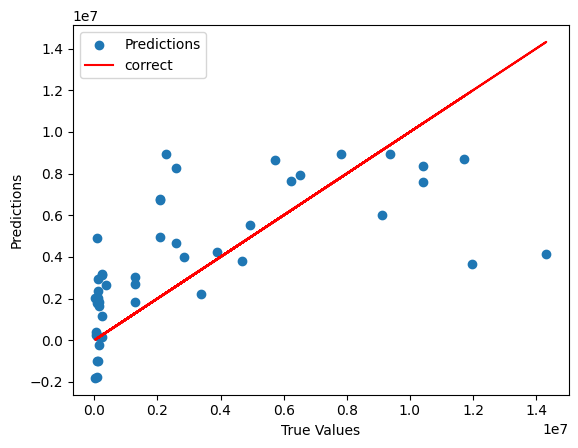

In [171]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate metrics
mse = mean_squared_error(y_test_original, predictions_originalWage)
r2 = r2_score(y_test_original, predictions_originalWage)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize predictions vs true values
plt.scatter(y_test_original, predictions_originalWage, label="Predictions")
plt.plot(y_test_original, y_test_original, color='red', label="correct")  # Line where x equals y
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()  # Display legend
plt.show()